In [1]:
import numpy as np #работа с массивами
import pandas as pd #работа с таблицами

import matplotlib.pyplot as plt #графики
%matplotlib inline
import matplotlib.cm as cm

from sklearn.cluster import KMeans #кластеризация
from sklearn.metrics import silhouette_samples, silhouette_score  #силуэт

import scipy.stats as sps

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster  # дендрограмма
from scipy.cluster import hierarchy

In [36]:
df = pd.read_excel('European.xlsx',index_col='Country')
df

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Country,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
W_Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
United_Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4


### Стандартизация данных (Первый способ)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[['Agr','Min','Man','PS','Con','SI','Fin','SPS','TC']]
X = scaler.fit_transform(X)
X

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507],
       [-0.21192785, -0.68738647,  0.08619551, -1.10512639,  1.13694923,
         1.14619796, -0.87207332,  0.01148634, -0.62014411],
       [-0.74982093,  1.94085592,  0.55187516, -0.29192018,  0.64117263,
         1.23535621,  0.21801833, -0.12290385, -0.25369532],
       [-0.84165634, -1.21303495, -0.65598143,  0.2502173 ,  1

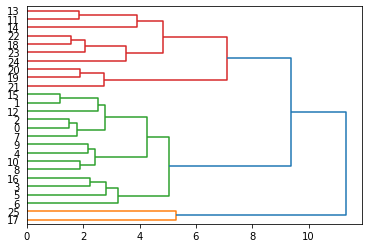

In [4]:
link=linkage(X, 'ward','euclidean')
dn=dendrogram(link,orientation="right")

### Исходя из первоначальной визуализации, можно сказать, что необходимо выделить 2-3 кластера.

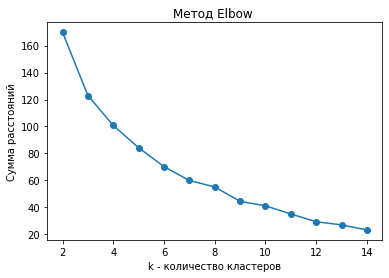

In [5]:
K=range(2,15)
#Перебираем значения к, списковое включение
MODELS=[KMeans(n_clusters=k,random_state=29).fit(X) for k in K]

#Находим значение критерия качества
dist=[i.inertia_ for i in MODELS]

#Строим график
plt.plot(K,dist,marker="o")
plt.xlabel("k - количество кластеров")
plt.ylabel("Сумма расстояний")
plt.title("Метод Elbow ")
plt.show()

### Из графика видно,что лучшим вариантом является разделение на два кластера

In [6]:
s_sc=[]
K=range(2,14)
for i in K:
    model = KMeans(n_clusters=i, random_state=42).fit(X)
    s_sc.append(float(silhouette_score(X, model.labels_)))
    print('Silhouette score for {} clusters:\t{:.2f}'.format(i, float(silhouette_score(X, model.labels_))))

Silhouette score for 2 clusters:	0.46
Silhouette score for 3 clusters:	0.27
Silhouette score for 4 clusters:	0.25
Silhouette score for 5 clusters:	0.22
Silhouette score for 6 clusters:	0.19
Silhouette score for 7 clusters:	0.18
Silhouette score for 8 clusters:	0.18
Silhouette score for 9 clusters:	0.19
Silhouette score for 10 clusters:	0.18
Silhouette score for 11 clusters:	0.17
Silhouette score for 12 clusters:	0.13
Silhouette score for 13 clusters:	0.14


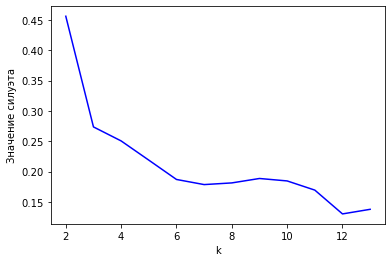

In [7]:
plt.plot(K,s_sc, color='blue')
plt.xlabel("k")
plt.ylabel("Значение силуэта")
plt.show()

### Опять же наибольшее значение силуэта при двух кластерах, а значит необходимо использовать деление на два кластера

### Рассмотрим дендрограмму для разделения на 3 и 2 кластера:

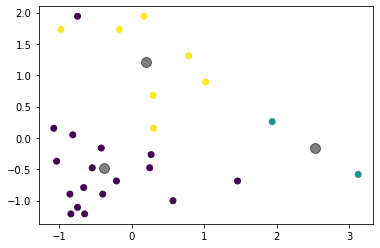

In [8]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=100, alpha=0.5);

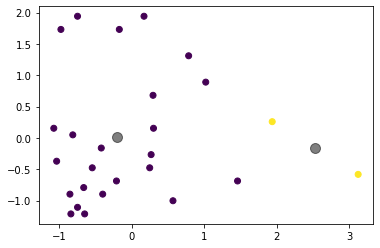

In [9]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=100, alpha=0.5);

### Лучшим вариантом разделения является разделение на два кластера

In [10]:
model = KMeans(n_clusters=2, random_state=42).fit(X)

df['cluster'] = model.labels_
df

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,cluster
Country,,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,0
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,0
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,0
W_Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,0
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,0
Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7,0
Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2,0
Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8,0
United_Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4,0


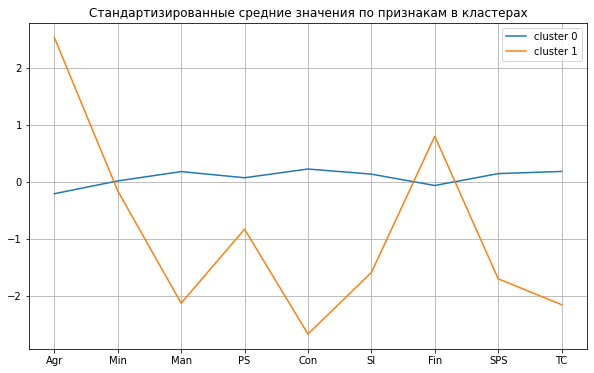

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df.columns[np.arange(9)], X[df['cluster'] == 0].mean(axis=0), label='cluster 0')
plt.plot(df.columns[np.arange(9)], X[df['cluster'] == 1].mean(axis=0), label='cluster 1')
plt.title('Стандартизированные средние значения по признакам в кластерах')
plt.legend()
plt.grid()
plt.show()

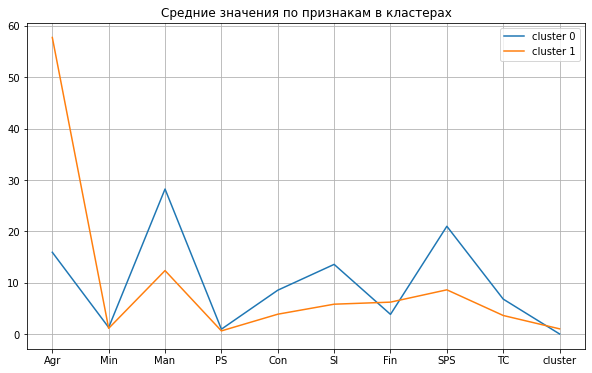

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df.columns[np.arange(10)], df.values[df['cluster'] == 0].mean(axis=0), label='cluster 0')
plt.plot(df.columns[np.arange(10)], df.values[df['cluster'] == 1].mean(axis=0), label='cluster 1')
plt.title('Cредние значения по признакам в кластерах')
plt.legend()
plt.grid()
plt.show()

In [13]:
m_0 = df[df['cluster'] == 0].mean(axis=0) #среднее значение в кластере 0
m_1 = df[df['cluster'] == 1].mean(axis=0) #среднее значение в кластере 1
print(m_0)
print(m_1)

Agr        15.912500
Min         1.266667
Man        28.229167
PS          0.933333
Con         8.525000
SI         13.554167
Fin         3.816667
SPS        20.975000
TC          6.791667
cluster     0.000000
dtype: float64
Agr        57.75
Min         1.10
Man        12.35
PS          0.60
Con         3.85
SI          5.80
Fin         6.20
SPS         8.60
TC          3.60
cluster     1.00
dtype: float64


### Проверим значимость различия средних по показателям в кластерах

In [15]:
np.std(df[df['cluster']==0]['Agr']), np.std(df[df['cluster']==1]['Agr'])

(10.502234385278847, 9.049999999999997)

### Так как во втором кластере нет достаточного количества наблюдений (только 2 страны), то данные в этом кластере НЕнормально распределены

In [16]:
from scipy.stats import mannwhitneyu

# сравнение средних
dat0=df[df['cluster'] == 0]['Agr']
dat1=df[df['cluster'] == 1]['Agr']
stat, p = mannwhitneyu(dat0,dat1)
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=0.000, p=0.012
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процентa занятых в сельском хозяйстве  отклоняется

In [18]:
sps.shapiro(df[df['cluster']==0]['Min'])

ShapiroResult(statistic=0.880979597568512, pvalue=0.008696571923792362)

In [23]:
# сравнение средних
dat1=df[df['cluster'] == 1]['Min']
dat0=df[df['cluster'] == 0]['Min']
stat, p = mannwhitneyu(dat0,dat1)
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=22.000, p=0.443
H0 не отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процента занятых в горно-добывающей промышленности принимается

In [19]:
sps.shapiro(df[df['cluster']==0]['Man'])

ShapiroResult(statistic=0.9766122102737427, pvalue=0.8262052536010742)

In [24]:
# сравнение средних
dat1=df[df['cluster'] == 1]['Man']
dat0=df[df['cluster'] == 0]['Man']
stat, p = mannwhitneyu(dat0,dat1)
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=0.000, p=0.012
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних  Процентa занятых в производстве отклоняется

In [20]:
sps.shapiro(df[df['cluster']==0]['PS'])

ShapiroResult(statistic=0.8867737650871277, pvalue=0.01140713132917881)

In [25]:
# сравнение средних
dat1=df[df['cluster'] == 1]['PS']
dat0=df[df['cluster'] == 0]['PS']
stat, p = mannwhitneyu(dat0,dat1)
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=17.000, p=0.264
H0 не отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процента занятых в энергетике принимается

In [21]:
sps.shapiro(df[df['cluster']==0]['Con'])

ShapiroResult(statistic=0.9503694176673889, pvalue=0.27597859501838684)

In [26]:
# сравнение средних
dat1=df[df['cluster'] == 1]['Con']
dat0=df[df['cluster'] == 0]['Con']
stat, p = mannwhitneyu(dat0,dat1)
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=0.000, p=0.012
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процентa занятых в строительстве отклоняется

In [22]:
sps.shapiro(df[df['cluster']==0]['SI'])

ShapiroResult(statistic=0.9075540900230408, pvalue=0.031224003061652184)

In [27]:
# сравнение средних
dat1=df[df['cluster'] == 1]['SI']
dat0=df[df['cluster'] == 0]['SI']
stat, p = mannwhitneyu(dat0,dat1)
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=2.000, p=0.019
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процентa занятых в сфере услуг отклоняется

In [23]:
sps.shapiro(df[df['cluster']==0]['Fin'])

ShapiroResult(statistic=0.9085167646408081, pvalue=0.03275535628199577)

In [28]:
# сравнение средних
dat1=df[df['cluster'] == 1]['Fin']
dat0=df[df['cluster'] == 0]['Fin']
stat, p = mannwhitneyu(dat0,dat1)
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=19.000, p=0.332
H0 не отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процентa занятых в финансовом секторе принимается

In [24]:
sps.shapiro(df[df['cluster']==0]['SPS'])

ShapiroResult(statistic=0.9655788540840149, pvalue=0.5601310133934021)

In [29]:
# сравнение средних
dat1=df[df['cluster'] == 1]['SPS']
dat0=df[df['cluster'] == 0]['SPS']
stat, p = mannwhitneyu(dat0,dat1)
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=3.000, p=0.024
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процентa занятых в социальных службах отклоняется

In [25]:
sps.shapiro(df[df['cluster']==0]['TC'])

ShapiroResult(statistic=0.929395854473114, pvalue=0.09450237452983856)

In [30]:
# сравнение средних
dat1=df[df['cluster'] == 1]['TC']
dat0=df[df['cluster'] == 0]['TC']
stat, p = mannwhitneyu(dat0,dat1)
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=0.000, p=0.012
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процент занятых в транспорте и связи отклоняется

For n_clusters = 2 The average silhouette_score is : 0.45628411877541164
For n_clusters = 3 The average silhouette_score is : 0.2736377223665529
For n_clusters = 4 The average silhouette_score is : 0.2505096666792621


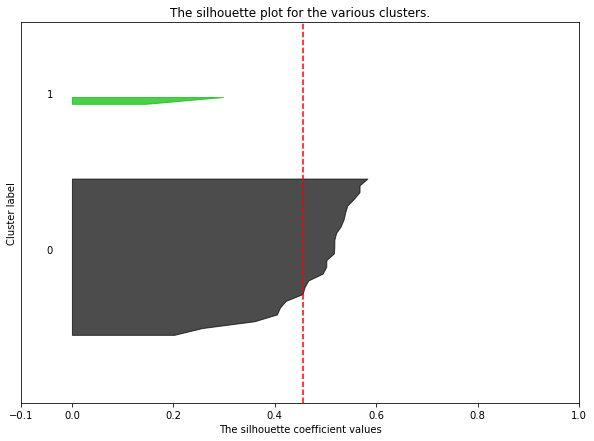

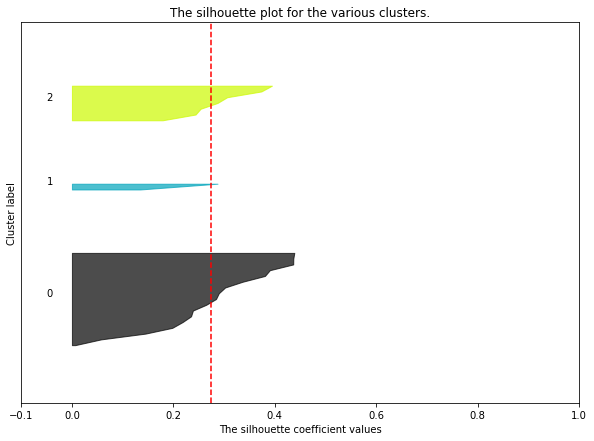

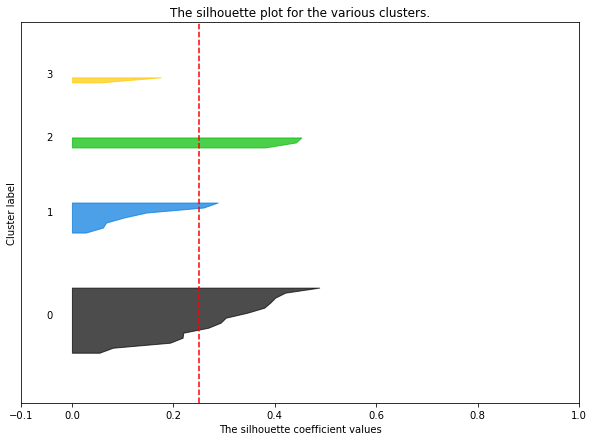

In [15]:
y = model.labels_
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(10, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])  

### Вывод (по первому способу стандартизации данных):

#### Наибольшее значение силуэта у деления на два кластера, поэтому было принято решение провести кластеризацию именно так. 

#### Таким образом, во второй кластер попали только две страны: Югославия и Турция. Страны характеризуются наибольшим средним стандартизированным процентом занятых в сельском хозяйстве и в финансовой сфере, но наименьшим процентом занятых в производстве, в строительстве, в сфере услуг, в социальных службах, в транспорте и связи. Тогда как страны второго кластера (все остальные страны кроме Югославии и Турции) имеют обратную характеристику.

#### Стоит отметить, что различие средних статистически незначимо по таким показателям как: Процент занятых в горно-добывающей промышленности, Процент занятых в энергетике, Процент занятых в финансовом секторе.

### Стандартизация данных (Второй способ)

In [37]:
df

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Country,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
W_Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
United_Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4


In [39]:
from sklearn import preprocessing
X2=df.values[:,1:]
data_norm=preprocessing.MinMaxScaler().fit_transform(X2)
X2

array([[0.26666667, 0.59159159, 0.44444444, 0.62068966, 1.        ,
        0.52777778, 0.78597786, 0.64516129],
       [0.        , 0.41741742, 0.27777778, 0.63218391, 0.67625899,
        0.55555556, 0.99261993, 0.62903226],
       [0.23333333, 0.58858859, 0.44444444, 0.70114943, 0.83453237,
        0.50925926, 0.63837638, 0.40322581],
       [0.4       , 0.83783784, 0.44444444, 0.51724138, 0.6618705 ,
        0.41666667, 0.62730627, 0.46774194],
       [0.3       , 0.38438438, 0.66666667, 0.54022989, 0.83453237,
        0.21296296, 0.57195572, 0.46774194],
       [0.16666667, 0.59159159, 0.22222222, 0.82758621, 0.92805755,
        0.10185185, 0.54612546, 0.40322581],
       [1.        , 0.68768769, 0.38888889, 0.73563218, 0.95683453,
        0.37962963, 0.51291513, 0.48387097],
       [0.        , 0.43843844, 0.5       , 0.81609195, 0.92086331,
        0.58333333, 0.85608856, 0.58064516],
       [0.43333333, 0.66966967, 0.72222222, 0.47126437, 0.84172662,
        0.48148148, 0.848708

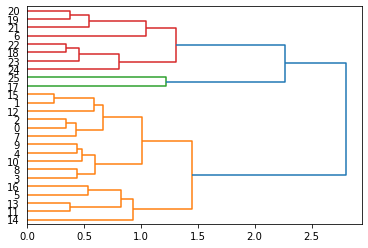

In [44]:
link=linkage(X2, 'ward','euclidean')
dn=dendrogram(link,orientation="right")

### Исходя из первоначальной визуализации, можно сказать, что необходимо выделить 2-3 кластера.

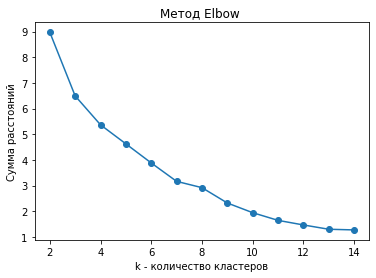

In [46]:
K=range(2,15)
#Перебираем значения к, списковое включение
MODELS=[KMeans(n_clusters=k,random_state=29).fit(X2) for k in K]

#Находим значение критерия качества
dist=[i.inertia_ for i in MODELS]

#Строим график
plt.plot(K,dist,marker="o")
plt.xlabel("k - количество кластеров")
plt.ylabel("Сумма расстояний")
plt.title("Метод Elbow ")
plt.show()

### Из графика видно,что хорошим вариантом является разделение на два кластера, однако неплохим вариантом является и разделение на три кластера.

In [48]:
s_sc=[]
K=range(2,14)
for i in K:
    model = KMeans(n_clusters=i, random_state=42).fit(X2)
    s_sc.append(float(silhouette_score(X2, model.labels_)))
    print('Silhouette score for {} clusters:\t{:.2f}'.format(i, float(silhouette_score(X2, model.labels_))))

Silhouette score for 2 clusters:	0.30
Silhouette score for 3 clusters:	0.35
Silhouette score for 4 clusters:	0.17
Silhouette score for 5 clusters:	0.20
Silhouette score for 6 clusters:	0.21
Silhouette score for 7 clusters:	0.20
Silhouette score for 8 clusters:	0.21
Silhouette score for 9 clusters:	0.20
Silhouette score for 10 clusters:	0.21
Silhouette score for 11 clusters:	0.17
Silhouette score for 12 clusters:	0.17
Silhouette score for 13 clusters:	0.15


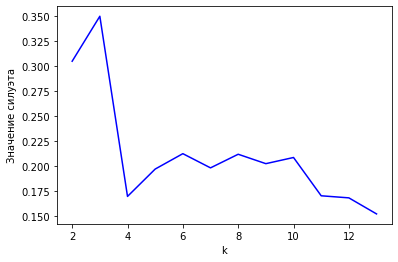

In [49]:
plt.plot(K,s_sc, color='blue')
plt.xlabel("k")
plt.ylabel("Значение силуэта")
plt.show()

### Наибольшее значение силуэта при делении на три кластера. Таким образом, необходимо использовать разделение на три кластера

### Рассмотрим дендрограмму для разделения на 3 и 2 кластера:

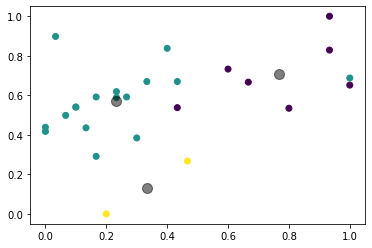

In [51]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=100, alpha=0.5);

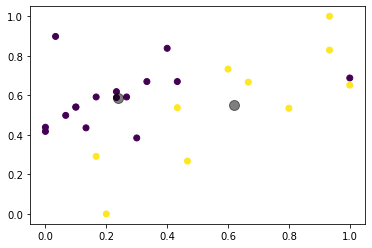

In [52]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=100, alpha=0.5);

### Лучшим вариантом разделения является разделение на три кластера

In [53]:
model = KMeans(n_clusters=3, random_state=42).fit(X)

df['cluster'] = model.labels_
df

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,cluster
Country,,,,,,,,,,
Belgium,0.009360,0.266667,0.591592,0.444444,0.620690,1.000000,0.527778,0.785978,0.645161,0
Denmark,0.101404,0.000000,0.417417,0.277778,0.632184,0.676259,0.555556,0.992620,0.629032,0
France,0.126365,0.233333,0.588589,0.444444,0.701149,0.834532,0.509259,0.638376,0.403226,0
W_Germany,0.062402,0.400000,0.837838,0.444444,0.517241,0.661871,0.416667,0.627306,0.467742,0
Ireland,0.319813,0.300000,0.384384,0.666667,0.540230,0.834532,0.212963,0.571956,0.467742,0
Italy,0.205928,0.166667,0.591592,0.222222,0.827586,0.928058,0.101852,0.546125,0.403226,0
Luxembourg,0.078003,1.000000,0.687688,0.388889,0.735632,0.956835,0.379630,0.512915,0.483871,0
Netherlands,0.056162,0.000000,0.438438,0.500000,0.816092,0.920863,0.583333,0.856089,0.580645,0
United_Kingdom,0.000000,0.433333,0.669670,0.722222,0.471264,0.841727,0.481481,0.848708,0.516129,0


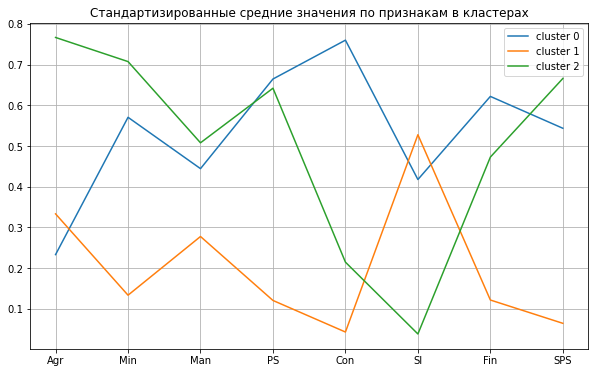

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(df.columns[np.arange(8)], X2[df['cluster'] == 0].mean(axis=0), label='cluster 0')
plt.plot(df.columns[np.arange(8)], X2[df['cluster'] == 1].mean(axis=0), label='cluster 1')
plt.plot(df.columns[np.arange(8)], X2[df['cluster'] == 2].mean(axis=0), label='cluster 2')
plt.title('Стандартизированные средние значения по признакам в кластерах')
plt.legend()
plt.grid()
plt.show()

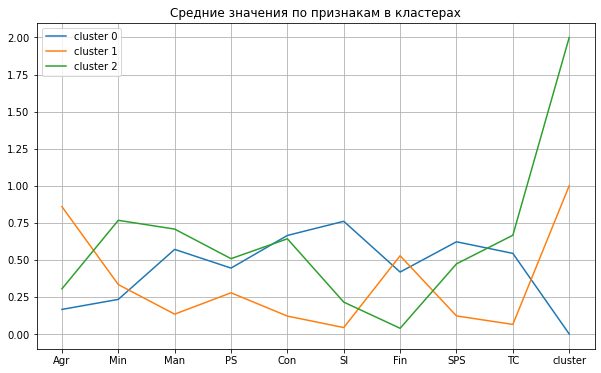

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(df.columns[np.arange(10)], df.values[df['cluster'] == 0].mean(axis=0), label='cluster 0')
plt.plot(df.columns[np.arange(10)], df.values[df['cluster'] == 1].mean(axis=0), label='cluster 1')
plt.plot(df.columns[np.arange(10)], df.values[df['cluster'] == 2].mean(axis=0), label='cluster 2')
plt.title('Cредние значения по признакам в кластерах')
plt.legend()
plt.grid()
plt.show()

In [60]:
m_0 = df[df['cluster'] == 0].mean(axis=0) #среднее значение в кластере 0
m_1 = df[df['cluster'] == 1].mean(axis=0) #среднее значение в кластере 1
m_2 = df[df['cluster'] == 2].mean(axis=0) #среднее значение в кластере 2
print(m_0)
print(m_1)
print(m_2)

Agr        0.165642
Min        0.233333
Man        0.570571
PS         0.444444
Con        0.664638
SI         0.760051
Fin        0.417756
SPS        0.621880
TC         0.543643
cluster    0.000000
dtype: float64
Agr        0.858814
Min        0.333333
Man        0.133634
PS         0.277778
Con        0.120690
SI         0.043165
Fin        0.527778
SPS        0.121771
TC         0.064516
cluster    1.000000
dtype: float64
Agr        0.304435
Min        0.766667
Man        0.707422
PS         0.507937
Con        0.642036
SI         0.214800
Fin        0.038360
SPS        0.472852
TC         0.665899
cluster    2.000000
dtype: float64


## Проверим значимость различия средних по показателям в кластерах

#### Так как во втором кластере нет достаточного количества наблюдений (только 2 страны), то данные в этом кластере НЕнормально распределены

In [63]:
sps.shapiro(df[df['cluster']==0]['Agr']), sps.shapiro(df[df['cluster']==2]['Agr'])

(ShapiroResult(statistic=0.8391872644424438, pvalue=0.007368097547441721),
 ShapiroResult(statistic=0.9426699876785278, pvalue=0.6628742814064026))

In [66]:
from scipy.stats import kruskal
stat, p = kruskal(df[df['cluster'] == 0]['Agr'], df[df['Agr'] == 1]['Agr'],df[df['cluster'] == 2]['Agr'])  
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=6.235, p=0.044
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процентa занятых в сельском хозяйстве отклоняется

In [67]:
sps.shapiro(df[df['cluster']==0]['Min']), sps.shapiro(df[df['cluster']==2]['Min'])

(ShapiroResult(statistic=0.788287341594696, pvalue=0.0014078787062317133),
 ShapiroResult(statistic=0.9300108551979065, pvalue=0.5509915351867676))

In [68]:
from scipy.stats import kruskal
stat, p = kruskal(df[df['cluster'] == 0]['Min'], df[df['cluster'] == 1]['Min'],df[df['cluster'] == 2]['Min'])  
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=12.101, p=0.002
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процента занятых в горно-добывающей промышленности отклоняется

In [69]:
sps.shapiro(df[df['cluster']==0]['Man']), sps.shapiro(df[df['cluster']==2]['Man'])

(ShapiroResult(statistic=0.9721276760101318, pvalue=0.8545507788658142),
 ShapiroResult(statistic=0.923385739326477, pvalue=0.4961520731449127))

In [70]:
from scipy.stats import kruskal
stat, p = kruskal(df[df['cluster'] == 0]['Man'], df[df['cluster'] == 1]['Man'],df[df['cluster'] == 2]['Man'])  
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=7.245, p=0.027
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процентa занятых в производстве отклоняется

In [71]:
sps.shapiro(df[df['cluster']==0]['PS']), sps.shapiro(df[df['cluster']==2]['PS'])

(ShapiroResult(statistic=0.8921448588371277, pvalue=0.05027073994278908),
 ShapiroResult(statistic=0.8575494885444641, pvalue=0.1439085602760315))

In [72]:
from scipy.stats import kruskal
stat, p = kruskal(df[df['cluster'] == 0]['PS'], df[df['cluster'] == 1]['PS'],df[df['cluster'] == 2]['PS'])  
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=0.505, p=0.777
H0 не отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процента занятых в энергетике принимается

In [73]:
sps.shapiro(df[df['cluster']==0]['Con']), sps.shapiro(df[df['cluster']==2]['Con'])

(ShapiroResult(statistic=0.9517549872398376, pvalue=0.48486313223838806),
 ShapiroResult(statistic=0.9813554286956787, pvalue=0.9658567905426025))

In [79]:
from scipy.stats import kruskal
stat, p = kruskal(df[df['cluster'] == 0]['Con'], df[df['cluster'] == 1]['Con'],df[df['cluster'] == 2]['Con'])  
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=5.354, p=0.069
H0 не отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процентa занятых в строительстве принимается

In [74]:
sps.shapiro(df[df['cluster']==0]['SI']), sps.shapiro(df[df['cluster']==2]['SI'])

(ShapiroResult(statistic=0.9104782342910767, pvalue=0.10191568732261658),
 ShapiroResult(statistic=0.9522059559822083, pvalue=0.749728798866272))

In [80]:
from scipy.stats import kruskal
stat, p = kruskal(df[df['cluster'] == 0]['SI'], df[df['cluster'] == 1]['SI'],df[df['cluster'] == 2]['SI'])  
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=16.893, p=0.000
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процентa занятых в сфере услуг отклоняется

In [75]:
sps.shapiro(df[df['cluster']==0]['Fin']), sps.shapiro(df[df['cluster']==2]['Fin'])

(ShapiroResult(statistic=0.9501447677612305, pvalue=0.45881375670433044),
 ShapiroResult(statistic=0.9418664574623108, pvalue=0.6555845141410828))

In [81]:
from scipy.stats import kruskal
stat, p = kruskal(df[df['cluster'] == 0]['Fin'], df[df['cluster'] == 1]['Fin'],df[df['cluster'] == 2]['Fin'])  
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=13.957, p=0.001
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процентa занятых в финансовом секторе отклоняется

In [77]:
sps.shapiro(df[df['cluster']==0]['SPS']), sps.shapiro(df[df['cluster']==2]['SPS'])

(ShapiroResult(statistic=0.965030312538147, pvalue=0.7270064949989319),
 ShapiroResult(statistic=0.9544620513916016, pvalue=0.7700527310371399))

In [83]:
from scipy.stats import kruskal
stat, p = kruskal(df[df['cluster'] == 0]['SPS'], df[df['cluster'] == 1]['SPS'],df[df['cluster'] == 2]['SPS'])  
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=5.848, p=0.054
H0 не отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процентa занятых в социальных службах отклоняется

In [82]:
sps.shapiro(df[df['cluster']==0]['TC']), sps.shapiro(df[df['cluster']==2]['TC'])

(ShapiroResult(statistic=0.8557724952697754, pvalue=0.01315049733966589),
 ShapiroResult(statistic=0.9677789211273193, pvalue=0.8820056319236755))

In [84]:
from scipy.stats import kruskal
stat, p = kruskal(df[df['cluster'] == 0]['TC'], df[df['cluster'] == 1]['TC'],df[df['cluster'] == 2]['TC'])  
print('Статистика=%.3f, p=%.3f' % (stat, p))
# вывод
alpha = 0.05
if p > alpha:
    print('H0 не отклоняется')
else:
    print('H0 отклоняется')

Статистика=7.113, p=0.029
H0 отклоняется


#### ВЫВОД: Гипотеза о равенстве средних Процент занятых в транспорте и связи отклоняется

For n_clusters = 2 The average silhouette_score is : 0.30466397004966106
For n_clusters = 3 The average silhouette_score is : 0.34958243781460724
For n_clusters = 4 The average silhouette_score is : 0.16968356469965334


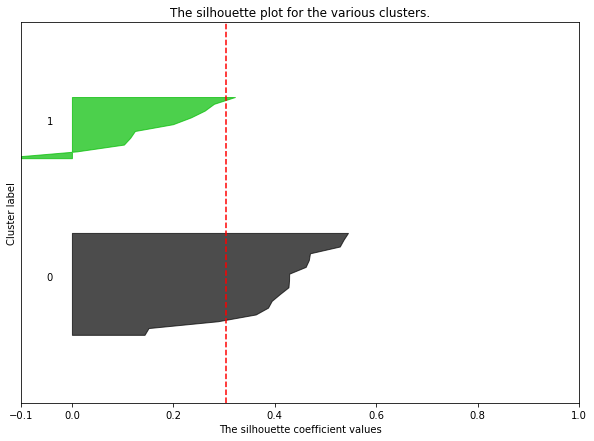

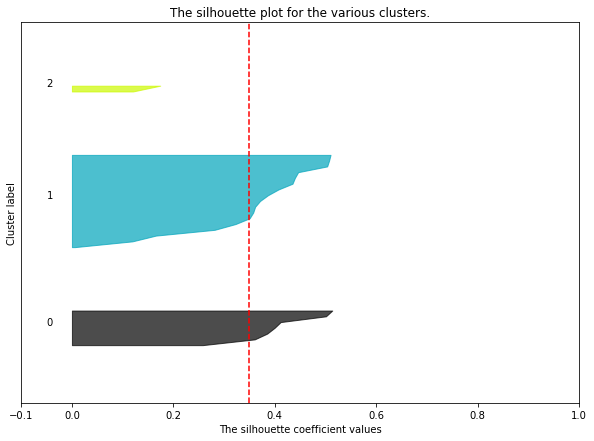

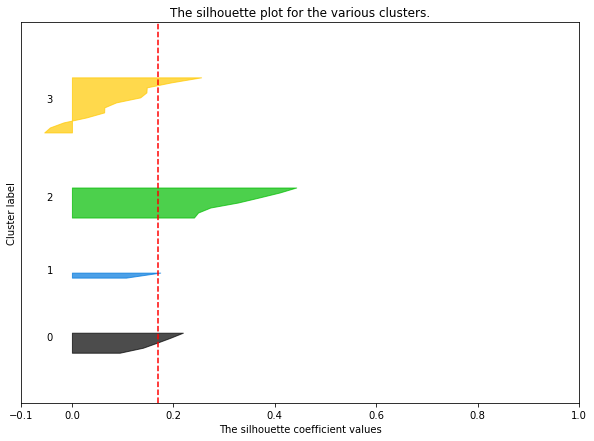

In [85]:
y = model.labels_
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(10, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X2) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X2)

    silhouette_avg = silhouette_score(X2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])  

### Вывод (По второму способу стандартизации данных)

#### Наибольшее значение силуэта у деления на три кластера, поэтому было принято решение провести кластеризацию именно так. 

#### Таким образом, в первый кластер попали следующие страны: Бельгия, Дания, Франция, Западная Германия, Ирландия, Италия, Люксембург, Нидерланды, Великобритания, Австрия, Финляндия, Греция, Норвегия, Португалия, Испания, Швеция, Швецария, которые характеризуются наибольшим средним процентом занятых в сфере услуг и социальной службе, однако наименьшим средним процентом занятых в сельском хозяйстве и в годно-добывающей промышленности.  

#### Во второй кластер попали только две страны: Югославия и Турция. Страны характеризуются наибольшим средним процентом занятых в сельском хозяйстве и в финансовой сфере, но наименьшим процентом занятых в производстве, в энергетике, в строительстве, в сфере услуг, в социальных службах, в транспорте и связи. 

#### Соответственно в третий кластер попали: Болгария, Чехословакия, Восточная Германия, Венгрия, Польша, Румыния, СССР, которые характеризуются наибольшим средним процентом занятых в гоно-добывающей промышленности, производстве, энергетике и в сфере транспорта и связи, однако наименьшим средним процентом занятых в финансовой сфере

#### Стоит отметить, что различие средних статистически незначимо по таким показателям как: Процент занятых в энергетике и Процент занятых в строительстве.

### Таким образом, сравнивая результаты двух проведённых кластерных анализов, можно сделать вывод о том, что при любом способе стандартизации данных выделяется кластер, который содержит в себе только две страны, а именно Югославию и Турцию, которые характеризуются наивысшим средним процентом населения, занятого в сельском хозяйстве. Из этого можно сделать вывод о том, что это на момент сбора данных (1979 год) были страны не с самой сильной экономикой, которая строилась на аграрной сфере. 

### При любом способе стандартизации данных выходили незначимые различия по некоторым отраслям, однако стоит отметить, что в первом случае это три показателя (Процент занятых в горно-добывающей промышленности, Процент занятых в энергетике, Процент занятых в финансовом секторе), тогда как во втором случае два показателя (Процент занятых в энергетике и Процент занятых в строительстве)

### Такие результаты имеют место быть. Если рассуждать о выборе кластерного анализа из двух приведённых, я склоняюсь больше к разделению на два кластера (первый вариант стандартизации данных), так как там четко прослеживается деление именно на два кластера по всем методам (метод Elbow и метот силуэтов (причём в первом случае значение силуэта выше на 0,11, по сравнению со вторым вариантом деления на кластеры, что довольно существенно)